# Homework 1. Exploratory Data Analysis



## Introduction

In this homework we ask you three questions that we expect you to answer using data. For each question we ask you to complete a series of tasks that should help guide you through the data analysis. Complete these tasks and then write a short (100 words or less) answer to the question.

**Note**: We will briefly discuss this homework assignment on Thursday in class.

#### Data
For this assignment we will use two databases: 

1. The [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics) which contains the "complete batting and pitching statistics from 1871 to 2013, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. 

2. [Gapminder](http://www.gapminder.org) is a great resource that contains over [500 data sets](http://www.gapminder.org/data/) related to world indicators such as income, GDP and life expectancy. 


#### Purpose

In this assignment, you will learn how to: 

a. Load in CSV files from the web. 

b. Create functions in python. 

C. Create plots and summary statistics for exploratory data analysis such as histograms, boxplots and scatter plots. 


#### Useful libraries for this assignment 

* [numpy](http://docs.scipy.org/doc/numpy-dev/user/index.html), for arrays
* [pandas](http://pandas.pydata.org/), for data frames
* [matplotlib](http://matplotlib.org/), for plotting

---

In [9]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Problem 1

In Lecture 1, we showed a plot that provided evidence that the 2002 and 2003 Oakland A's, a team that used data science, had a competitive advantage. Since, others teams have started using data science as well. Use exploratory data analysis to determine if the competitive advantage has since disappeared. 

#### Problem 1(a) 
Load in [these CSV files](http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip) from the [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics). For this assignment, we will use the 'Salaries.csv' and 'Teams.csv' tables. Read these tables into a pandas `DataFrame` and show the head of each table. 

**Hint** Use the [requests](http://docs.python-requests.org/en/latest/), [StringIO](http://docs.python.org/2/library/stringio.html) and [zipfile](https://docs.python.org/2/library/zipfile.html) modules to get from the web.  

In [29]:
#your code here

url = 'salaries.csv'
sal = pd.read_csv(url)
print (sal.head())

print()

urls = 'Teams.csv'
teams = pd.read_csv(urls)
print(teams.head())


   yearID teamID lgID   playerID   salary
0    1985    BAL   AL  murraed02  1472819
1    1985    BAL   AL   lynnfr01  1090000
2    1985    BAL   AL  ripkeca01   800000
3    1985    BAL   AL   lacyle01   725000
4    1985    BAL   AL  flanami01   641667

   yearID lgID teamID franchID divID  Rank   G  Ghome   W   L     ...       \
0    1871  NaN    PH1      PNA   NaN     1  28    NaN  21   7     ...        
1    1871  NaN    CH1      CNA   NaN     2  28    NaN  19   9     ...        
2    1871  NaN    BS1      BNA   NaN     3  31    NaN  20  10     ...        
3    1871  NaN    WS3      OLY   NaN     4  32    NaN  15  15     ...        
4    1871  NaN    NY2      NNA   NaN     5  33    NaN  16  17     ...        

   DP    FP                     name                      park  attendance  \
0 NaN  0.84   Philadelphia Athletics  Jefferson Street Grounds         NaN   
1 NaN  0.82  Chicago White Stockings   Union Base-Ball Grounds         NaN   
2 NaN  0.83     Boston Red Stockings       S

#### Problem 1(b)

Summarize the Salaries DataFrame to show the total salaries for each team for each year. Show the head of the new summarized DataFrame. 

In [30]:
#your code here
summarized_sal = sal[['yearID','teamID','salary']].groupby(['yearID','teamID'], as_index=False).sum()
summarized_sal.head()

,yearID,teamID,salary
0,1985,ATL,14807000
1,1985,BAL,11560712
2,1985,BOS,10897560
3,1985,CAL,14427894
4,1985,CHA,9846178


#### Problem 1(c)

Merge the new summarized Salaries DataFrame and Teams DataFrame together to create a new DataFrame
showing wins and total salaries for each team for each year year. Show the head of the new merged DataFrame.

**Hint**: Merge the DataFrames using `teamID` and `yearID`.

In [31]:
#your code here
final = pd.merge(summarized_sal,teams[['yearID','teamID','W']], on=['yearID','teamID'])
final.head()

,yearID,teamID,salary,W
0,1985,ATL,14807000,66
1,1985,BAL,11560712,83
2,1985,BOS,10897560,81
3,1985,CAL,14427894,90
4,1985,CHA,9846178,85


#### Problem 1(d)

How would you graphically display the relationship between total wins and total salaries for a given year? What kind of plot would be best? Choose a plot to show this relationship and specifically annotate the Oakland baseball team on the on the plot. Show this plot across multiple years. In which years can you detect a competitive advantage from the Oakland baseball team of using data science? When did this end? 

**Hints**: Use a `for` loop to consider multiple years. Use the `teamID` (three letter representation of the team name) to save space on the plot.  

In [41]:
#your code here
import requests

import zipfile
final.shape
final.dtypes
year_final=final[['yearID','teamID','salary','W']].groupby(['yearID'],as_index=False)

print (year_final.head(1))

for i in range(2000,2014):
    current_year=final[final['yearID']==i]
    plt.scatter(current_year.salary/1e6,current_year.W, alpha=0.5, color=map(lambda x: 'red' if x=='OAK' else 'blue',current_year.teamID))
    plt.title("Salaries vs Wins in year "+ str(i),fontsize=20)
    plt.xlabel("Salaries in Millions",fontsize=15)
    plt.ylabel("Wins", fontsize=15)
    plt.xlim(0, 180)
    plt.ylim(30, 130)
    plt.grid()
    plt.show()



     yearID teamID     salary    W
0      1985    ATL   14807000   66
26     1986    ATL   17102786   72
52     1987    ATL   16544560   69
78     1988    ATL   12728174   54
104    1989    ATL   11112334   63
130    1990    ATL   14555501   65
156    1991    ATL   18403500   94
182    1992    ATL   34625333   98
208    1993    ATL   41641417  104
236    1994    ATL   49383513   68
264    1995    ATL   47235445   90
292    1996    ATL   49698500   96
320    1997    ANA   31135472   84
348    1998    ANA   41281000   85
378    1999    ANA   55388166   70
408    2000    ANA   51464167   82
438    2001    ANA   47535167   75
468    2002    ANA   61721667   99
498    2003    ANA   79031667   77
528    2004    ANA  100534667   92
558    2005    ARI   62329166   77
588    2006    ARI   59684226   76
618    2007    ARI   52067546   90
648    2008    ARI   66202712   82
678    2009    ARI   73115666   70
708    2010    ARI   60718166   65
738    2011    ARI   53639833   94
768    2012    ARI  

#### Problem 1(e):

**For AC209 Students**: Fit a linear regression to the data from each year and obtain the residuals. Plot the residuals against time to detect patterns that support your answer in 1(d). 

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # Remove the CWD from sys.path while we load stuff.


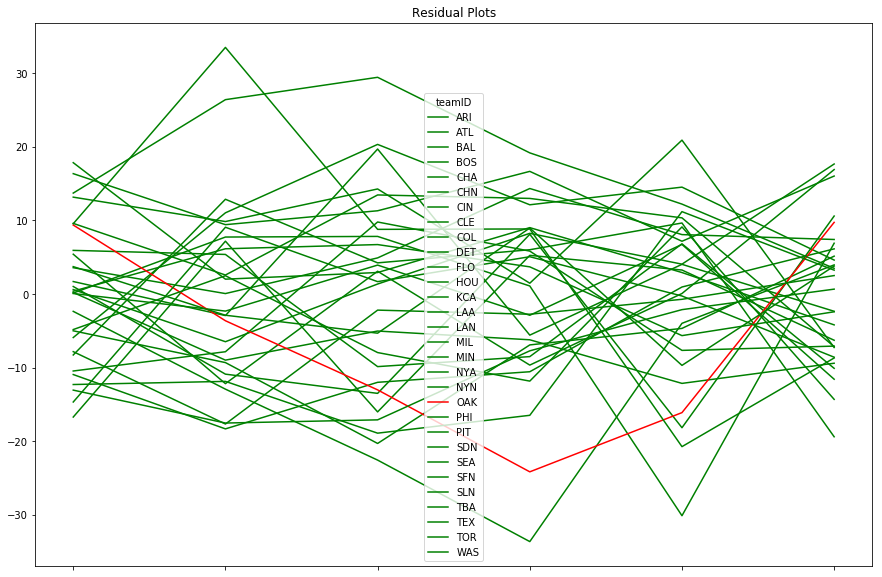

In [48]:
#your code here
residual=pd.DataFrame()

for i in range(2000,2006):
    current=final[final['yearID']==i]
    x_vals=current['salary'].values/1e6
    y_vals=current['W'].values
    y=y_vals
    A = np.vstack([x_vals, np.ones(len(x_vals))]).T
    m, c = np.linalg.lstsq(A, y)[0] 
    y_hat=m*x_vals+c
    residual[i]=y-y_hat
    
residual.index=current['teamID']
residual = residual.T
residual.index = residual.index.format()
residual.plot(title="Residual Plots",figsize=(15,10),color= map(lambda x: 'red' if x=='NYN' else 'green',current_year.teamID))
plt.show()

## Discussion for Problem 1

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---


## Problem 2

Several media reports have demonstrated the income inequality has increased in the US during this last decade. Here we will look at global data. Use exploratory data analysis to determine if the gap between Africa/Latin America/Asia and Europe/NorthAmerica has increased, decreased or stayed the same during the last two decades. 

#### Problem 2(a)

Using the list of countries by continent from [World Atlas](http://www.worldatlas.com/cntycont.htm) data, load in the `countries.csv` file into a pandas DataFrame and name this data set as `countries`.  This data set can be found on Github in the 2014_data repository [here](https://github.com/cs109/2014_data/blob/master/countries.csv). 

In [54]:
#your code here
url = 'countries.csv'
countri = pd.read_csv(url)
countri.head()

,Country,Region
0,Algeria,AFRICA
1,Angola,AFRICA
2,Benin,AFRICA
3,Botswana,AFRICA
4,Burkina,AFRICA


Using the [data available on Gapminder](http://www.gapminder.org/data/), load in the [Income per person (GDP/capita, PPP$ inflation-adjusted)](https://spreadsheets.google.com/pub?key=phAwcNAVuyj1jiMAkmq1iMg&gid=0) as a pandas DataFrame and name this data set as `income`.

**Hint**: Consider using the pandas function `pandas.read_excel()` to read in the .xlsx file directly.

In [70]:
#your code here
url = 'income.xlsx'
income = pd.read_excel(url)
countri.head()

,"Agriculture, value added (% of GDP)",1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45.158479,46.013843,41.594103,39.480416,32.589058,34.494833,28.134488,31.177550,29.915323,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.311622,23.996207,23.499999,22.800000,22.000000,21.117256,20.304655,20.401935,20.160029,20.04532
4,Algeria,NaN,NaN,NaN,NaN,12.876213,9.137256,10.330666,10.853374,9.030165,...,10.003598,10.491237,10.188493,8.221657,7.988789,8.025346,6.920100,6.915571,6.915571,NaN


Transform the data set to have years as the rows and countries as the columns. Show the head of this data set when it is loaded. 

In [9]:
#your code here
import pandas as pd
url = 'income.xlsx'
income = pd.read_excel(url)

income.head()


,"Agriculture, value added (% of GDP)",1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45.158479,46.013843,41.594103,39.480416,32.589058,34.494833,28.134488,31.177550,29.915323,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.311622,23.996207,23.499999,22.800000,22.000000,21.117256,20.304655,20.401935,20.160029,20.04532
4,Algeria,NaN,NaN,NaN,NaN,12.876213,9.137256,10.330666,10.853374,9.030165,...,10.003598,10.491237,10.188493,8.221657,7.988789,8.025346,6.920100,6.915571,6.915571,NaN


#### Problem 2(b)

Graphically display the distribution of income per person across all countries in the world for any given year (e.g. 2000).  What kind of plot would be best? 

Text(0.5,0,'Price')

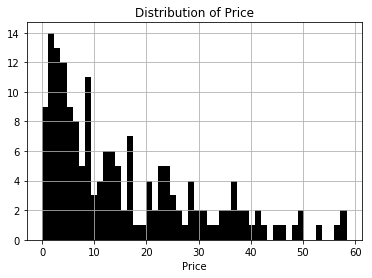

In [97]:
#your code here
income['2000'].hist(bins=50, color = 'black')
plt.title('distribution of income per person')
plt.xlabel('Price')


#### Problem 2(c)

Write a function to merge the `countries` and `income` data sets for any given year. 

In [27]:
"""
Function
--------
mergeByYear

Return a merged DataFrame containing the income, 
country name and region for a given year. 

Parameters
----------
year : int
    The year of interest

Returns
-------
a DataFrame
   A pandas DataFrame with three columns titled 
   'Country', 'Region', and 'Income'. 

Example
-------
>>> mergeByYear(2010)
"""
#your code here
url = 'income.xlsx'
income = pd.read_excel(url)
def mergeByYear(year):
    a <- which(rownames(income)==year) 
    b <- data.frame('Country'=colnames(income), 'income'=income[a,])
    merge(countries, b, by='Country')

mergeByYear(2010).head()


#### Problem 2(d) 

Use exploratory data analysis tools such as histograms and boxplots to explore the distribution of the income per person by region data set from 2(c) for a given year. Describe how these change through the recent years?

**Hint**: Use a `for` loop to consider multiple years.  

In [31]:
#your code here
years = [1060, 1070, 1080, 1090, 2000 ];
par(mfrow=c(3,2))
url = 'income.xlsx'
income = pd.read_excel(url)
for i in range (0,4): 
    aa <- mergeByYear(years[i]) 
    boxplot(income, data=aa, log='y', las=2, main=paste('Income by Region in', years[i])) 



## Discussion for Problem 2

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---


## Problem 3

In general, if group A has larger values than group B on average, does this mean the largest values are from group A? Discuss after completing each of the problems below. 

#### Problem 3(a)

Assume you have two list of numbers, X and Y, with distribution approximately normal. X and Y have standard deviation equal to 1, but the average of X is different from the average of Y.  If the difference in the average of X and the average of Y is larger than 0, how does the proportion of X > a compare to the proportion of Y > a? 

Write a function that analytically calculates the ratio of these two proportions: Pr(X > a)/Pr(Y > a) as function of the difference in the average of X and the average of Y. 

**Hint**: Use the `scipy.stats` module for useful functions related to a normal random variable such as the probability density function, cumulative distribution function and survival function. 

**Update**: Assume Y is normally distributed with mean equal to 0. 

Show the curve for different values of a (a = 2,3,4 and 5).

In [ ]:
"""
Function
--------
ratioNormals

Return ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a) as function of 
    the difference in the average of X 
    and the average of Y. 

Parameters
----------
diff : difference in the average of X 
    and the average of Y. 
a : cutoff value

Returns
-------
Returns ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a)
    
Example
-------
>>> ratioNormals(diff = 1, a = 2)
"""
#your code here

In [13]:
#your code here

#### Problem 3(b)

Now consider the distribution of income per person from two regions: Asia and South America. Estimate the average income per person across the countries in those two regions. Which region has the larger average of income per person across the countries in that region? 

**Update**: Use the year 2012. 

In [14]:
#your code here
data <-mergeByYear(2012) 
data2 <- subset(data, Region=='ASIA' | Region=='SOUTH AMERICA') 
aggregate(data2$income, list(data2$Region), mean, na.rm=T)


#### Problem 3(c) 

Calculate the proportion of countries with income per person that is greater than 10,000 dollars. Which region has a larger proportion of countries with income per person greater than 10,000 dollars? If the answer here is different from the answer in 3(b), explain why in light of your answer to 3(a).

**Update**: Use the year 2012. 

In [15]:
#your code here
ratioCountries<- function(groupedData, a):
    all <- count(data2$Region) 
    above <- count(data2$Region[data2$income>=a]) 
    avginc <- ddply(data2, .(Region), summarize, income=mean(income, na.rm=T)) #requires plyr library 
    rat <- above[,2]/all[,2] 
    cbind(avginc, ratio=rat)

df <- subset(data2, Region=='ASIA' | Region=='SOUTH AMERICA') 
df_ratio = ratioCountries(df, 1e4) 
df_ratio

#### Problem 3(d)

**For AC209 Students**: Re-run this analysis in Problem 3 but compute the average income per person for each region, instead of the average of the reported incomes per person across countries in the region. Why are these two different? Hint: use this [data set](https://spreadsheets.google.com/pub?key=phAwcNAVuyj0XOoBL_n5tAQ&gid=0). 

In [16]:
#your code here

## Discussion for Problem 3

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---
